In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Завдання 1

Створено та візуалізовано граф — модель певної реальної мережі.

Проведено аналіз основних характеристик.

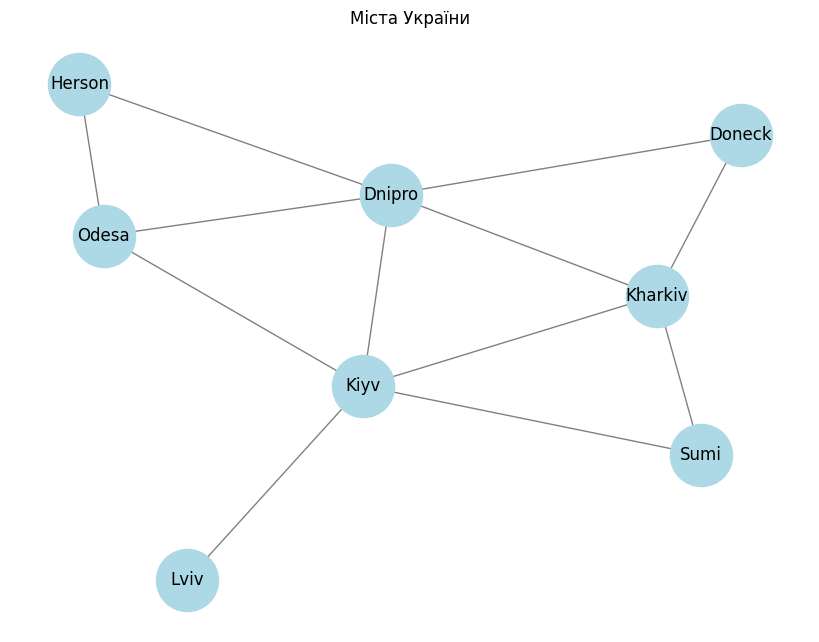

Степінь центральності:
Odesa: 0.43
Kiyv: 0.71
Lviv: 0.14
Sumi: 0.29
Kharkiv: 0.57
Dnipro: 0.71
Doneck: 0.29
Herson: 0.29

Центральність за проміжними вершинами (Betweenness Centrality):
Odesa: 0.06
Kiyv: 0.41
Lviv: 0.00
Sumi: 0.00
Kharkiv: 0.13
Dnipro: 0.29
Doneck: 0.00
Herson: 0.00

Центральність за близькістю (Closeness Centrality):
Odesa: 0.64
Kiyv: 0.78
Lviv: 0.47
Sumi: 0.54
Kharkiv: 0.70
Dnipro: 0.78
Doneck: 0.54
Herson: 0.50

Інформація про граф:
Кількість вершин: 8
Кількість ребер: 12
Ступінь вершин: [('Odesa', 3), ('Kiyv', 5), ('Lviv', 1), ('Sumi', 2), ('Kharkiv', 4), ('Dnipro', 5), ('Doneck', 2), ('Herson', 2)]


In [2]:
G = nx.Graph()

cityes = ['Odesa', 'Kiyv', 'Lviv', 'Sumi', 'Kharkiv', 'Dnipro', 'Doneck', 'Herson']
G.add_nodes_from(cityes)

connections = [
    ('Odesa', 'Kiyv'),
    ('Odesa', 'Dnipro'),
    ('Odesa', 'Herson'),

    ('Kiyv', 'Lviv'),
    ('Kiyv', 'Sumi'),
    ('Kiyv', 'Kharkiv'),
    ('Kiyv', 'Dnipro'),

    ('Sumi', 'Kharkiv'),

    ('Kharkiv', 'Dnipro'),
    ('Kharkiv', 'Doneck'),

    ('Dnipro', 'Doneck'),
    ('Dnipro', 'Herson')
]
G.add_edges_from(connections)

plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
plt.title("Міста України")
plt.show()

degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

print("Степінь центральності:")
for city, centrality in degree_centrality.items():
    print(f"{city}: {centrality:.2f}")

print("\nЦентральність за проміжними вершинами (Betweenness Centrality):")
for city, centrality in betweenness_centrality.items():
    print(f"{city}: {centrality:.2f}")

print("\nЦентральність за близькістю (Closeness Centrality):")
for city, centrality in closeness_centrality.items():
    print(f"{city}: {centrality:.2f}")

print("\nІнформація про граф:")
print("Кількість вершин:", G.number_of_nodes())
print("Кількість ребер:", G.number_of_edges())
print("Ступінь вершин:", nx.degree(G))

# Завдання 2

Програмно реалізовано алгоритми DFS і BFS для знаходження шляхів у графі, який було розроблено у першому завданні.

Здійснено порівняння результатів алгоритмів для цього графа, пояснено різницю в отриманих шляхах. Обґрунтовано, чому шляхи для алгоритмів саме такі.

In [3]:
def dfs_recursive(graph, vertex, visited=None):
    if visited is None:
        visited = set()
    visited.add(vertex)
    print(vertex, end=' ')
    for neighbor in graph[vertex]:
        if neighbor not in visited:
            dfs_recursive(graph, neighbor, visited)

Алгоритм DFS (глибина) починається з вибраної вершини та продовжує відвідування наступної необхідної вершини, що є сусідом попередньої, переходячи все глибше у граф, доки не дійде до мертвого кінця, після чого він повертається назад, щоб знайти необхідні вершини, які ще не були відвідані, і продовжує цей процес, поки не відвідає всі вершини.

In [4]:
dfs_recursive(G, 'Odesa')

Odesa Kiyv Lviv Sumi Kharkiv Dnipro Doneck Herson 

In [5]:
from collections import deque

def bfs_iterative(graph, start):
    visited = set()
    queue = deque([start])

    while queue:  
        vertex = queue.popleft()
        if vertex not in visited:
            print(vertex, end=" ")
            visited.add(vertex)
            still_unvisited = set(graph[vertex]) - visited
            queue.extend(still_unvisited)

Алгоритм BFS (ширина) починається з вибраної вершини та відвідує всі її сусідні вершини, перш ніж перейти до сусідів цих сусідів. BFS продовжує відвідувати вершини в ширину графа, перш ніж переходить глибше.

In [6]:
bfs_iterative(G, 'Odesa')

Odesa Dnipro Herson Kiyv Kharkiv Doneck Sumi Lviv 

Як видно з результатів алгоритм в глибину починаючи з Одеси пішов в Київ і далі продовжував обстежувати сусідві столиці перш ніж перейти далі

Алгоритм в ширину проходився по вершинам які є найближчими до початкової вершини Одеса ігноруючи при цьому кластери рукавів. Можна уявити собі коло яке поступово розширюєтся з точки Одеса і міста що першими дотикаются до цього кола першими проходятся цим алгоритмом

# Завдання 3


У граф додано ваги ребер, програмно реалізовано алгоритм Дейкстри для знаходження найкоротшого шляху в розробленому графі.

In [7]:
G_weighted = nx.Graph()
G_weighted.add_nodes_from(cityes)

for city1, city2 in connections:
    G_weighted.add_edge(city1, city2, weight=random.randint(1, 10))

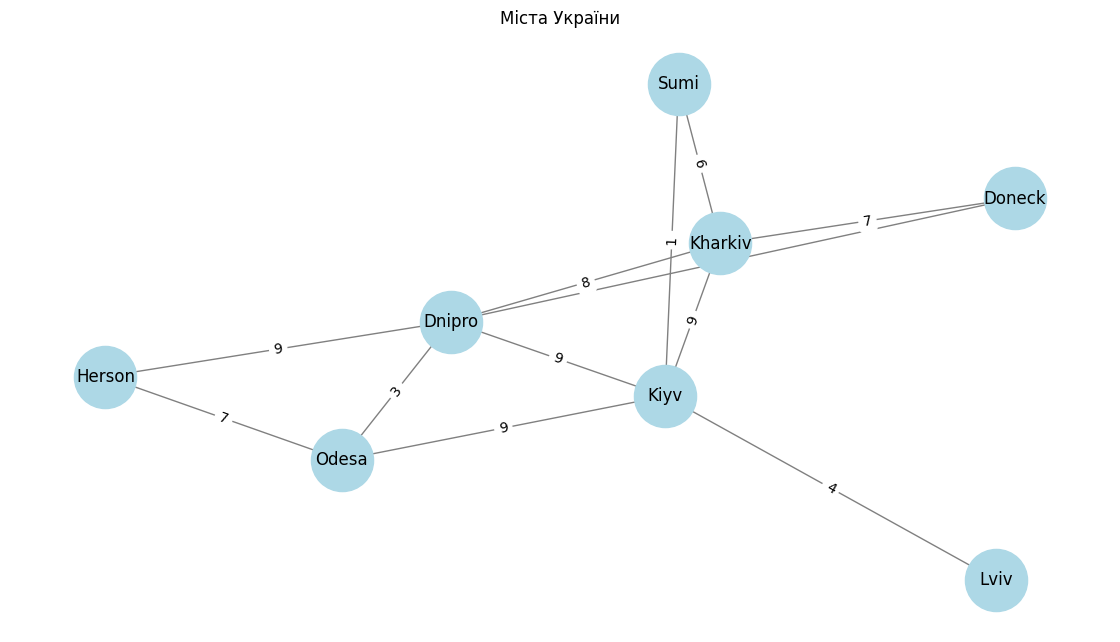

In [8]:
plt.figure(figsize=(11,6))
pos = nx.spring_layout(G_weighted, seed=42)
nx.draw(G_weighted, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
labels = nx.get_edge_attributes(G_weighted, 'weight')
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=labels)
plt.title("Міста України")
plt.show()

In [9]:
def dijkstra(graph, start):
    distances = {vertex: float('infinity') for vertex in graph.nodes}
    distances[start] = 0
    unvisited = list(graph.nodes)

    while unvisited:
        current_vertex = min(unvisited, key=lambda vertex: distances[vertex])

        if distances[current_vertex] == float('infinity'):
            break

        for neighbor in graph.neighbors(current_vertex):
            weight = graph[current_vertex][neighbor]['weight']
            distance = distances[current_vertex] + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance

        unvisited.remove(current_vertex)

    return distances

In [10]:
dijkstra(G_weighted, 'Odesa')

{'Odesa': 0,
 'Kiyv': 9,
 'Lviv': 13,
 'Sumi': 10,
 'Kharkiv': 11,
 'Dnipro': 3,
 'Doneck': 5,
 'Herson': 7}

In [11]:
nx.single_source_dijkstra_path_length(G_weighted, source = "Odesa", cutoff=None, weight='weight')

{'Odesa': 0,
 'Dnipro': 3,
 'Doneck': 5,
 'Herson': 7,
 'Kiyv': 9,
 'Sumi': 10,
 'Kharkiv': 11,
 'Lviv': 13}